In [1]:
import pandas_datareader as pdr

In [2]:
import pandas as pd

In [3]:
dataframe=pdr.get_data_tiingo('AAPL',api_key='ccfaacf44804ba689b5d2788efc212cb200b8066')

/Users/prabhdeepsingh/miniforge3/envs/env_tensorflow/lib/python3.9/site-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [4]:
dataframe.to_csv('apple.csv')

In [5]:
dataframe=pd.read_csv('apple.csv')

In [6]:
dataframe

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-07-17 00:00:00+00:00,149.56,150.90,148.5700,148.82,23243713,35.389423,35.706498,35.155165,35.214321,92974852,0.0,1.0
1,AAPL,2017-07-18 00:00:00+00:00,150.08,150.13,148.6700,149.20,17713795,35.512467,35.524298,35.178828,35.304238,70855180,0.0,1.0
2,AAPL,2017-07-19 00:00:00+00:00,151.02,151.42,149.9500,150.48,20615419,35.734893,35.829543,35.481706,35.607116,82461676,0.0,1.0
3,AAPL,2017-07-20 00:00:00+00:00,150.34,151.74,150.1900,151.50,17053326,35.573989,35.905262,35.538496,35.848473,68213304,0.0,1.0
4,AAPL,2017-07-21 00:00:00+00:00,150.27,150.44,148.8800,149.99,24671002,35.557426,35.597652,35.228519,35.491171,98684008,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,AAPL,2022-07-11 00:00:00+00:00,144.87,146.64,143.7800,145.67,63305113,144.870000,146.640000,143.780000,145.670000,63305113,0.0,1.0
1255,AAPL,2022-07-12 00:00:00+00:00,145.86,148.45,145.0500,145.76,77588759,145.860000,148.450000,145.050000,145.760000,77588759,0.0,1.0
1256,AAPL,2022-07-13 00:00:00+00:00,145.49,146.45,142.1201,142.99,71185560,145.490000,146.450000,142.120100,142.990000,71185560,0.0,1.0
1257,AAPL,2022-07-14 00:00:00+00:00,148.47,148.95,143.2500,144.08,78140744,148.470000,148.950000,143.250000,144.080000,78140744,0.0,1.0


In [7]:
dataframe1=dataframe.reset_index()['close']

In [8]:
# now dataframe contains only clossing values of stock.
dataframe1

0       149.56
1       150.08
2       151.02
3       150.34
4       150.27
         ...  
1254    144.87
1255    145.86
1256    145.49
1257    148.47
1258    150.17
Name: close, Length: 1259, dtype: float64

In [9]:
import matplotlib.pyplot as plt

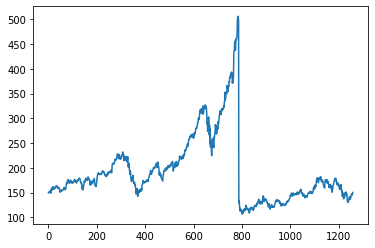

In [10]:
# ploting current dataset values
plt.plot(dataframe1)

In [11]:
import numpy as np

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
dataframe1=scaler.fit_transform(np.array(dataframe1).reshape(-1,1))

In [13]:
#dataframe b=values are converted to range 0 to 1 
dataframe1


array([[0.10700063],
       [0.10830307],
       [0.11065748],
       ...,
       [0.09680651],
       [0.10427051],
       [0.10852849]])

In [14]:
#splitting dataset into train and test split

In [15]:
trainsize=int(len(dataframe1)*0.65);

In [16]:
testsize=len(dataframe1)-trainsize;

In [17]:
traindata=dataframe1[0:trainsize,:]

In [18]:
testdata=dataframe1[trainsize:len(dataframe1),:]

In [19]:
import numpy
def create_dataset(dataset,timestep=1):
    datax,datay=[],[]
    for i in range(len(dataset)-timestep-1):
        a=dataset[i:(i+timestep),0]
        datax.append(a)
        datay.append(dataset[i+timestep,0])
    return numpy.array(datax),numpy.array(datay)

In [20]:
timestep=100
xtrain,ytrain=create_dataset(traindata,timestep)
xtest,ytest=create_dataset(testdata,timestep)

In [21]:
xtrain


array([[0.10700063, 0.10830307, 0.11065748, ..., 0.16082655, 0.15769568,
        0.15729493],
       [0.10830307, 0.11065748, 0.10895429, ..., 0.15769568, 0.15729493,
        0.15571697],
       [0.11065748, 0.10895429, 0.10877896, ..., 0.15729493, 0.15571697,
        0.15649343],
       ...,
       [0.5212774 , 0.51671885, 0.53197245, ..., 0.02419537, 0.01582968,
        0.0206387 ],
       [0.51671885, 0.53197245, 0.52601127, ..., 0.01582968, 0.0206387 ,
        0.02036318],
       [0.53197245, 0.52601127, 0.53112085, ..., 0.0206387 , 0.02036318,
        0.02537257]])

In [22]:
print(xtrain.shape)

(717, 100)


In [23]:
# reshaping data so that we can give input to our lstm
xtrain =xtrain.reshape(xtrain.shape[0],xtrain.shape[1] , 1)
xtest = xtest.reshape(xtest.shape[0],xtest.shape[1] , 1)

In [24]:
from tensorflow.keras.models import Sequential

In [25]:
from tensorflow.keras.layers import LSTM,Dense

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 10s 418ms/step - loss: 0.0323 - val_loss: 8.4433e-04
Epoch 2/100
12/12 [==============================] - 1s 120ms/step - loss: 0.0126 - val_loss: 0.0054
Epoch 3/100
12/12 [==============================] - 1s 120ms/step - loss: 0.0100 - val_loss: 5.3533e-04
Epoch 4/100
12/12 [==============================] - 1s 122ms/step - loss: 0.0087 - val_loss: 3.5076e-04
Epoch 5/100
12/12 [==============================] - 1s 121ms/step - loss: 0.0077 - val_loss: 2.7517e-04
Epoch 6/100
12/12 [==============================] - 1s 123ms/step - loss: 0.0068 - val_loss: 2.3065e-04
Epoch 7/100
12/12 [==============================] - 1s 125ms/step - loss: 0.0066 - val_loss: 3.3964e-04
Epoch 8/100
12/12 [==============================] - 1s 122ms/step - loss: 0.0056 - val_loss: 6.3211e-04
Epoch 9/100
12/12 [==============================] - 2s 131ms/step - loss: 0.0049 - val_loss: 3.0130e-04
Epoch 10/100
12/12 [==============================] - 1s 1

12/12 [==============================] - 1s 121ms/step - loss: 0.0019 - val_loss: 1.5421e-04
Epoch 79/100
12/12 [==============================] - 2s 127ms/step - loss: 0.0022 - val_loss: 1.8608e-04
Epoch 80/100
12/12 [==============================] - 2s 132ms/step - loss: 0.0019 - val_loss: 1.6025e-04
Epoch 81/100
12/12 [==============================] - 2s 133ms/step - loss: 0.0018 - val_loss: 1.4133e-04
Epoch 82/100
12/12 [==============================] - 1s 125ms/step - loss: 0.0013 - val_loss: 1.6034e-04
Epoch 83/100
12/12 [==============================] - 2s 145ms/step - loss: 0.0015 - val_loss: 3.0780e-04
Epoch 84/100
12/12 [==============================] - 1s 127ms/step - loss: 0.0015 - val_loss: 3.4531e-04
Epoch 85/100
12/12 [==============================] - 2s 128ms/step - loss: 0.0013 - val_loss: 1.9967e-04
Epoch 86/100
12/12 [==============================] - 2s 132ms/step - loss: 0.0016 - val_loss: 1.4915e-04
Epoch 87/100
12/12 [==============================] - 2s 13

In [28]:
# now after creating LSTM model we have to predict the values using the model

In [29]:
trainpredict=model.predict(xtrain)

23/23 [==============================] - 3s 72ms/step


In [30]:
testpredict=model.predict(xtest)

11/11 [==============================] - 1s 96ms/step


In [31]:
trainpredict=scaler.inverse_transform(trainpredict)

In [32]:
testpredict=scaler.inverse_transform(testpredict)

In [33]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(ytrain,trainpredict))

235.91055036441514

In [34]:
math.sqrt(mean_squared_error(ytest,testpredict))

151.22311718077742

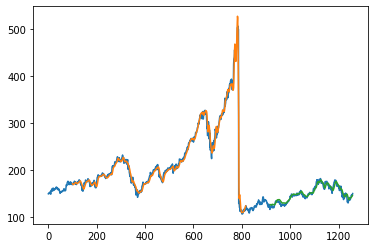

In [35]:
#Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(dataframe1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainpredict)+look_back, :] = trainpredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataframe1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainpredict)+(look_back*2)+1:len(dataframe1)-1, :] = testpredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataframe1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [36]:
len(testdata)

441

In [37]:
#taking 100 values for future prediction
xinput=testdata[341:].reshape(1,-1)
xinput.shape

(1, 100)

In [38]:
#convertig x inputarray to list
listinput=list(xinput)
listinput=listinput[0].tolist()

In [39]:
listinput


[0.14396994364433308,
 0.13332498434564805,
 0.14001252348152782,
 0.14529743268628675,
 0.14597370068879145,
 0.14116468378209135,
 0.14958046336881647,
 0.1487539135879774,
 0.14108954289292414,
 0.13139636819035688,
 0.1267376330619912,
 0.1405385097056981,
 0.12944270507201,
 0.11994990607388845,
 0.10965560425798371,
 0.12085159674389478,
 0.13212273011897302,
 0.13470256731371316,
 0.14311834690043823,
 0.14662492172824038,
 0.1552410770194113,
 0.1587226048841578,
 0.16839073262366933,
 0.17001878522229175,
 0.17222291797119593,
 0.18063869755792106,
 0.1776581089542893,
 0.16974326862867878,
 0.16899185973700687,
 0.1793362554790231,
 0.17087038196618654,
 0.16278021289918598,
 0.1635566687539135,
 0.158422041327489,
 0.14755165936130238,
 0.1523356293049467,
 0.15919849718221663,
 0.14639949906073885,
 0.1458484658735128,
 0.15168440826549778,
 0.15125860989355033,
 0.14922980588603624,
 0.13763306199123349,
 0.140363180964308,
 0.1251346274264245,
 0.12455854727614268,
 0.142

In [40]:
#predicting data for next 30 days
from numpy import array

output=[]
n=100
i=0
while(i<30):
    
    if(len(listinput)>100):
        xinput=np.array(listinput[1:])
        print("{} day input {}".format(i,xinput))
        xinput=xinput.reshape(1,-1)
        xinput = xinput.reshape((1, n, 1))
        yhat = model.predict(xinput, verbose=0)
        print("{} day output {}".format(i,yhat))
        listinput.extend(yhat[0].tolist())
        listinput=listinput[1:]
        output.extend(yhat.tolist())
        i=i+1
    else:
        xinput = xinput.reshape((1, n,1))
        yhat = model.predict(xinput, verbose=0)
        print(yhat[0])
        listinput.extend(yhat[0].tolist())
        print(len(listinput))
        output.extend(yhat.tolist())
        i=i+1
    

print(output)

[0.10254095]
101
1 day input [0.13332498 0.14001252 0.14529743 0.1459737  0.14116468 0.14958046
 0.14875391 0.14108954 0.13139637 0.12673763 0.14053851 0.12944271
 0.11994991 0.1096556  0.1208516  0.13212273 0.13470257 0.14311835
 0.14662492 0.15524108 0.1587226  0.16839073 0.17001879 0.17222292
 0.1806387  0.17765811 0.16974327 0.16899186 0.17933626 0.17087038
 0.16278021 0.16355667 0.15842204 0.14755166 0.15233563 0.1591985
 0.1463995  0.14584847 0.15168441 0.15125861 0.14922981 0.13763306
 0.14036318 0.12513463 0.12455855 0.14226675 0.12726362 0.12804008
 0.13184721 0.14822793 0.12505949 0.12633688 0.11326237 0.11939887
 0.09933626 0.08946775 0.10086412 0.09693175 0.10619912 0.08510958
 0.07641828 0.07701941 0.09084534 0.08395742 0.08435817 0.09252348
 0.107201   0.10519724 0.10487163 0.11113338 0.096531   0.09843456
 0.10487163 0.10299311 0.08966813 0.07586725 0.0627176  0.06492173
 0.07160927 0.05815905 0.06191609 0.07271133 0.07140889 0.0787226
 0.08721353 0.08721353 0.07664371 0

9 day output [[0.11280081]]
10 day input [0.12673763 0.14053851 0.12944271 0.11994991 0.1096556  0.1208516
 0.13212273 0.13470257 0.14311835 0.14662492 0.15524108 0.1587226
 0.16839073 0.17001879 0.17222292 0.1806387  0.17765811 0.16974327
 0.16899186 0.17933626 0.17087038 0.16278021 0.16355667 0.15842204
 0.14755166 0.15233563 0.1591985  0.1463995  0.14584847 0.15168441
 0.15125861 0.14922981 0.13763306 0.14036318 0.12513463 0.12455855
 0.14226675 0.12726362 0.12804008 0.13184721 0.14822793 0.12505949
 0.12633688 0.11326237 0.11939887 0.09933626 0.08946775 0.10086412
 0.09693175 0.10619912 0.08510958 0.07641828 0.07701941 0.09084534
 0.08395742 0.08435817 0.09252348 0.107201   0.10519724 0.10487163
 0.11113338 0.096531   0.09843456 0.10487163 0.10299311 0.08966813
 0.07586725 0.0627176  0.06492173 0.07160927 0.05815905 0.06191609
 0.07271133 0.07140889 0.0787226  0.08721353 0.08721353 0.07664371
 0.08112711 0.07484033 0.0803757  0.08696306 0.09036944 0.09896055
 0.10068879 0.0952536  

18 day output [[0.11922553]]
19 day input [0.14662492 0.15524108 0.1587226  0.16839073 0.17001879 0.17222292
 0.1806387  0.17765811 0.16974327 0.16899186 0.17933626 0.17087038
 0.16278021 0.16355667 0.15842204 0.14755166 0.15233563 0.1591985
 0.1463995  0.14584847 0.15168441 0.15125861 0.14922981 0.13763306
 0.14036318 0.12513463 0.12455855 0.14226675 0.12726362 0.12804008
 0.13184721 0.14822793 0.12505949 0.12633688 0.11326237 0.11939887
 0.09933626 0.08946775 0.10086412 0.09693175 0.10619912 0.08510958
 0.07641828 0.07701941 0.09084534 0.08395742 0.08435817 0.09252348
 0.107201   0.10519724 0.10487163 0.11113338 0.096531   0.09843456
 0.10487163 0.10299311 0.08966813 0.07586725 0.0627176  0.06492173
 0.07160927 0.05815905 0.06191609 0.07271133 0.07140889 0.0787226
 0.08721353 0.08721353 0.07664371 0.08112711 0.07484033 0.0803757
 0.08696306 0.09036944 0.09896055 0.10068879 0.0952536  0.09773325
 0.09680651 0.10427051 0.10852849 0.10254095 0.10439372 0.10587333
 0.10709399 0.10816571 

27 day output [[0.1238892]]
28 day input [0.16899186 0.17933626 0.17087038 0.16278021 0.16355667 0.15842204
 0.14755166 0.15233563 0.1591985  0.1463995  0.14584847 0.15168441
 0.15125861 0.14922981 0.13763306 0.14036318 0.12513463 0.12455855
 0.14226675 0.12726362 0.12804008 0.13184721 0.14822793 0.12505949
 0.12633688 0.11326237 0.11939887 0.09933626 0.08946775 0.10086412
 0.09693175 0.10619912 0.08510958 0.07641828 0.07701941 0.09084534
 0.08395742 0.08435817 0.09252348 0.107201   0.10519724 0.10487163
 0.11113338 0.096531   0.09843456 0.10487163 0.10299311 0.08966813
 0.07586725 0.0627176  0.06492173 0.07160927 0.05815905 0.06191609
 0.07271133 0.07140889 0.0787226  0.08721353 0.08721353 0.07664371
 0.08112711 0.07484033 0.0803757  0.08696306 0.09036944 0.09896055
 0.10068879 0.0952536  0.09773325 0.09680651 0.10427051 0.10852849
 0.10254095 0.10439372 0.10587333 0.10709399 0.10816571 0.10915899
 0.11010972 0.11103218 0.11192971 0.11280081 0.11364277 0.11445303
 0.11522992 0.1159729

In [41]:
daynew=np.arange(1,101)
dayprediction=np.arange(101,131)

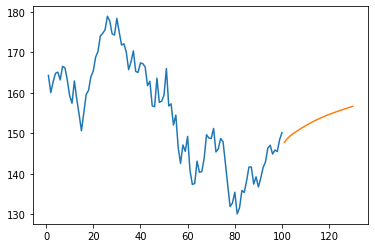

In [42]:
plt.plot(daynew,scaler.inverse_transform(dataframe1[1159:]))
plt.plot(dayprediction,scaler.inverse_transform(output))

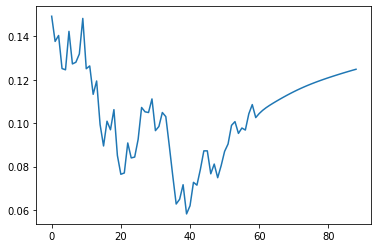

In [43]:
dataframe2=dataframe1.tolist()
dataframe2.extend(output)
plt.plot(dataframe2[1200:])

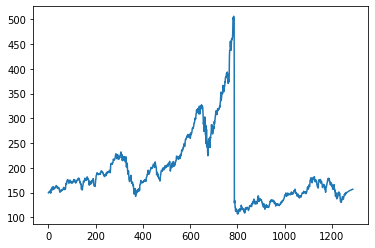

In [44]:
dataframe2=scaler.inverse_transform(dataframe2).tolist()
plt.plot(dataframe2)

In [45]:
output=scaler.inverse_transform(output)

In [46]:
output

array([[147.77947626],
       [148.51919296],
       [149.10992757],
       [149.59727545],
       [150.02516018],
       [150.42172786],
       [150.80130735],
       [151.16959806],
       [151.52793859],
       [151.87572507],
       [152.21187773],
       [152.5353703 ],
       [152.84554538],
       [153.14220666],
       [153.42552368],
       [153.69611815],
       [153.95477537],
       [154.20263463],
       [154.44079358],
       [154.67043314],
       [154.89268369],
       [155.10852983],
       [155.31877769],
       [155.52408764],
       [155.72491183],
       [155.92155366],
       [156.11415296],
       [156.30276326],
       [156.48739348],
       [156.66793951]])

In [47]:
output.shape


(30, 1)

In [48]:
# successfully predicted the output of tesla stock